In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
import scipy.stats as st


%matplotlib inline
%config InlineBackend.figure_format='svg'


G=6.67*10**-11
k=1.38*10**-23#J/K
h=6.626*10**-34#J*s

P=321.53#s obs orbit period
nu=1/P#s-1 obs orbit frequency
Pdot=-3.67*10**-11# *-1
nudot=-Pdot*nu**2
nuddot=11/3*nudot**2/nu

print("P,nu,Pdot,nudot,nuddot",P,nu,Pdot,nudot,nuddot)

msun=2*10**30#kg
r_sun=6.963*10**8#m
l_sun=3.828*10**33#erg/s
c=3*10**8#m


P,nu,Pdot,nudot,nuddot 321.53 0.003110129692408174 -3.67e-11 3.5499567602208195e-16 1.485727142206684e-28


In [2]:

sampleNo = 2000
np.random.seed(0)

fluxopt=np.random.normal(1.29, 0.14, sampleNo)*10**-12#erg/s
forb=0.003110138
fdot = 10**-16*np.random.normal(3.57, 0.02, sampleNo)
T=np.random.normal(25700, 2400, sampleNo)
q = np.random.normal(0.5, 0.13, sampleNo )

Mchirp=(5*fdot/96/((2*np.pi)**(8/3))*c**5/G**(5/3)/forb**(11/3))**(3/5)/msun
M1=Mchirp*(1+q)**0.2/q**0.6
M2=M1*q


In [3]:
fdot.dtype,q.dtype,M1.dtype

(dtype('float64'), dtype('float64'), dtype('O'))

In [4]:
np.average(M1)

AttributeError: 'float' object has no attribute 'dtype'

<function matplotlib.pyplot.show>

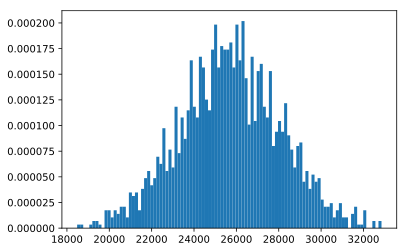

In [5]:
plt.hist(T, 100, normed=True)
plt.show

In [6]:
sigma=5.6704*10**-5# Stefan-Boltzmann constant erg cm-2s-1K-4
pc=3.08567756*10**18#cm

M0=0.8#msun
R0=6.5*10**6#m
R1=R0*(M1/M0)**(-1/3)
d=((R1*100)**2*sigma*T**4/fluxopt)**0.5/pc

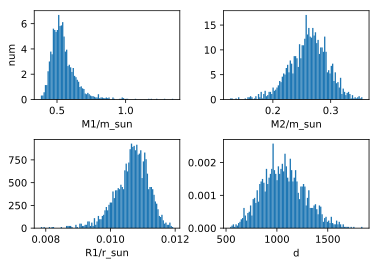

In [32]:

#plt.figure(figsize=(16,9))
plt.subplots_adjust(hspace=0.45, wspace=0.3)
plt.subplot(221)
plt.hist(M1, 100, normed=True)
plt.xlabel("M1/m_sun")
plt.ylabel("num")
plt.subplot(222)
plt.hist(M2, 100, normed=True)
plt.xlabel("M2/m_sun")
plt.subplot(223)
plt.hist(R1/r_sun, 100, normed=True)
plt.xlabel("R1/r_sun")
plt.subplot(224)
plt.hist(d, 100, normed=True)
plt.xlabel("d/pc")

#plt.legend()
#plt.show()
plt.savefig("distributionofdistance.pdf")

In [30]:
ls *.pdf


bb.pdf                      bb_5.pdf
bb1.pdf                     distributionofdistance.pdf
bb_1.pdf                    gwpytest01.pdf
bb_4.pdf


In [9]:
dnew=np.zeros(d.size)
for i in np.arange(d.size):
    dnew[i]=d[i]

In [10]:
dsquare=dnew*dnew

In [11]:
d.size,dsquare.size

(2000, 2000)

In [12]:
#dnew,dsquare,dnew.size

In [13]:
print(np.average(dnew),(np.average(dsquare)-np.average(dnew)**2)**0.5)

1068.25178277 211.06327904
